In [1]:
from google.colab import files
files.upload()  # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adnan88","key":"01c1bb664a603012dbe668e37dd3926c"}'}

In [7]:
# Configure Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Download dataset from Kaggle
!kaggle datasets download -d akalyasubramanian/dataset-for-knn-classification

# Unzip the dataset
!unzip -o dataset-for-knn-classification.zip -d knn_dataset


Dataset URL: https://www.kaggle.com/datasets/akalyasubramanian/dataset-for-knn-classification
License(s): unknown
  0% 0.00/285 [00:00<?, ?B/s]
100% 285/285 [00:00<00:00, 1.15MB/s]
Archive:  dataset-for-knn-classification.zip
  inflating: knn_dataset/TShirt_size.csv  


In [9]:
import pandas as pd

df = pd.read_csv("/content/knn_dataset/TShirt_size.csv")
df.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Height (in cms)  18 non-null     int64 
 1   Weight (in kgs)  18 non-null     int64 
 2   T Shirt Size     18 non-null     object
dtypes: int64(2), object(1)
memory usage: 564.0+ bytes


In [12]:
print(df.isnull().sum())

Height (in cms)    0
Weight (in kgs)    0
T Shirt Size       0
dtype: int64


### Split Data and Feature Scaling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# separate target variable
X = df.drop('T Shirt Size',axis=1)
y = df['T Shirt Size']

In [16]:
# split dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluation

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           L       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


 Confusion Matrix:
 [[1 0]
 [0 3]]


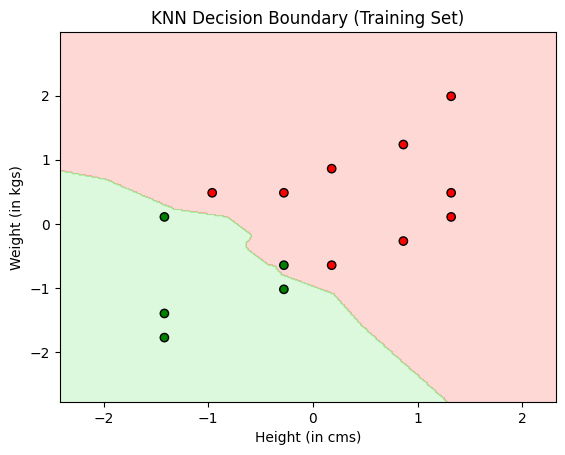

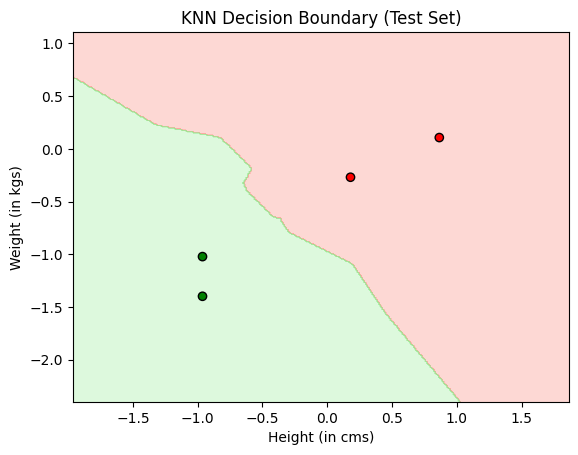

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# Select two features for visualization
feature1 = X.columns[0]
feature2 = X.columns[1]

X2 = df[[feature1, feature2]].values
y2 = df['T Shirt Size'].values

# Encode target variable
label_encoder = LabelEncoder()
y2_encoded = label_encoder.fit_transform(y2)

# Split & scale for 2D plotting
X2_train, X2_test, y2_train_encoded, y2_test_encoded = train_test_split(
    X2, y2_encoded, test_size=0.2, random_state=42, stratify=y2_encoded
)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled  = scaler2.transform(X2_test)

# Train KNN on these two features
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train_scaled, y2_train_encoded)

# Decision boundary function
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('salmon', 'lightgreen')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'green')))
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(title)
    plt.show()

# Plot Training Decision Boundary
plot_boundary(knn2, X2_train_scaled, y2_train_encoded, "KNN Decision Boundary (Training Set)")

# Plot Test Decision Boundary
plot_boundary(knn2, X2_test_scaled, y2_test_encoded, "KNN Decision Boundary (Test Set)")